In [1]:
import pythetatools.toyxp as toyxp
import pythetatools.likelihood as likelihood
from pythetatools.global_names import erec_egdes, analysis_type_to_xmax, osc_param_name
from pythetatools.base_visualisation import t2k_style, darkblue
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pythetatools
from pythetatools.base_visualisation import show_minor_ticks
from pythetatools.file_manager import read_histogram

import uproot

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use(t2k_style)

In [2]:
%load_ext autoreload
%autoreload 2



In [4]:
filename = "/Users/denis.carabadjac/Python/pythetatools/inputs/ToyXp/ToyXP_00000.root"
toy = toyxp.load(filename, kind="asimov", itoy=1)
print(toy)

6 samples are included in this toy: 
Title: nue1R; Sample title: nue1R; Dimension: 2; Shape: (15, 15); Analysis type: PTheta Integral: 113.16748176120451
Title: numu1R; Sample title: numu1R; Dimension: 2; Shape: (73, 6); Analysis type: e-theta Integral: 417.2024917961284
Title: nuebar1R; Sample title: nuebar1R; Dimension: 2; Shape: (15, 15); Analysis type: PTheta Integral: 17.624306048442836
Title: numubar1R; Sample title: numubar1R; Dimension: 2; Shape: (73, 6); Analysis type: e-theta Integral: 146.66609212345074
Title: nue1RD; Sample title: nue1RD; Dimension: 2; Shape: (15, 15); Analysis type: PTheta Integral: 10.040108925208447
Title: numucc1pi; Sample title: numucc1pi; Dimension: 1; Shape: (73,); Analysis type: Erec Integral: 123.9050076912214


In [5]:
nue1R = toy['nue1R'].project_to_y()
nue1R2x = nue1R+20
nue1R_mul = nue1R2x*2
nue1R_mul = nue1R2x*nue1R2x


nue1R_div = nue1R2x/nue1R
nue1R_neg = -nue1R


In [6]:
print(nue1R_neg)

Title: nue1R; Sample title: nue1R; Dimension: 1; Shape: (15,); Analysis type: Theta Integral: -113.16748176120453


(-30.0, 30.0)

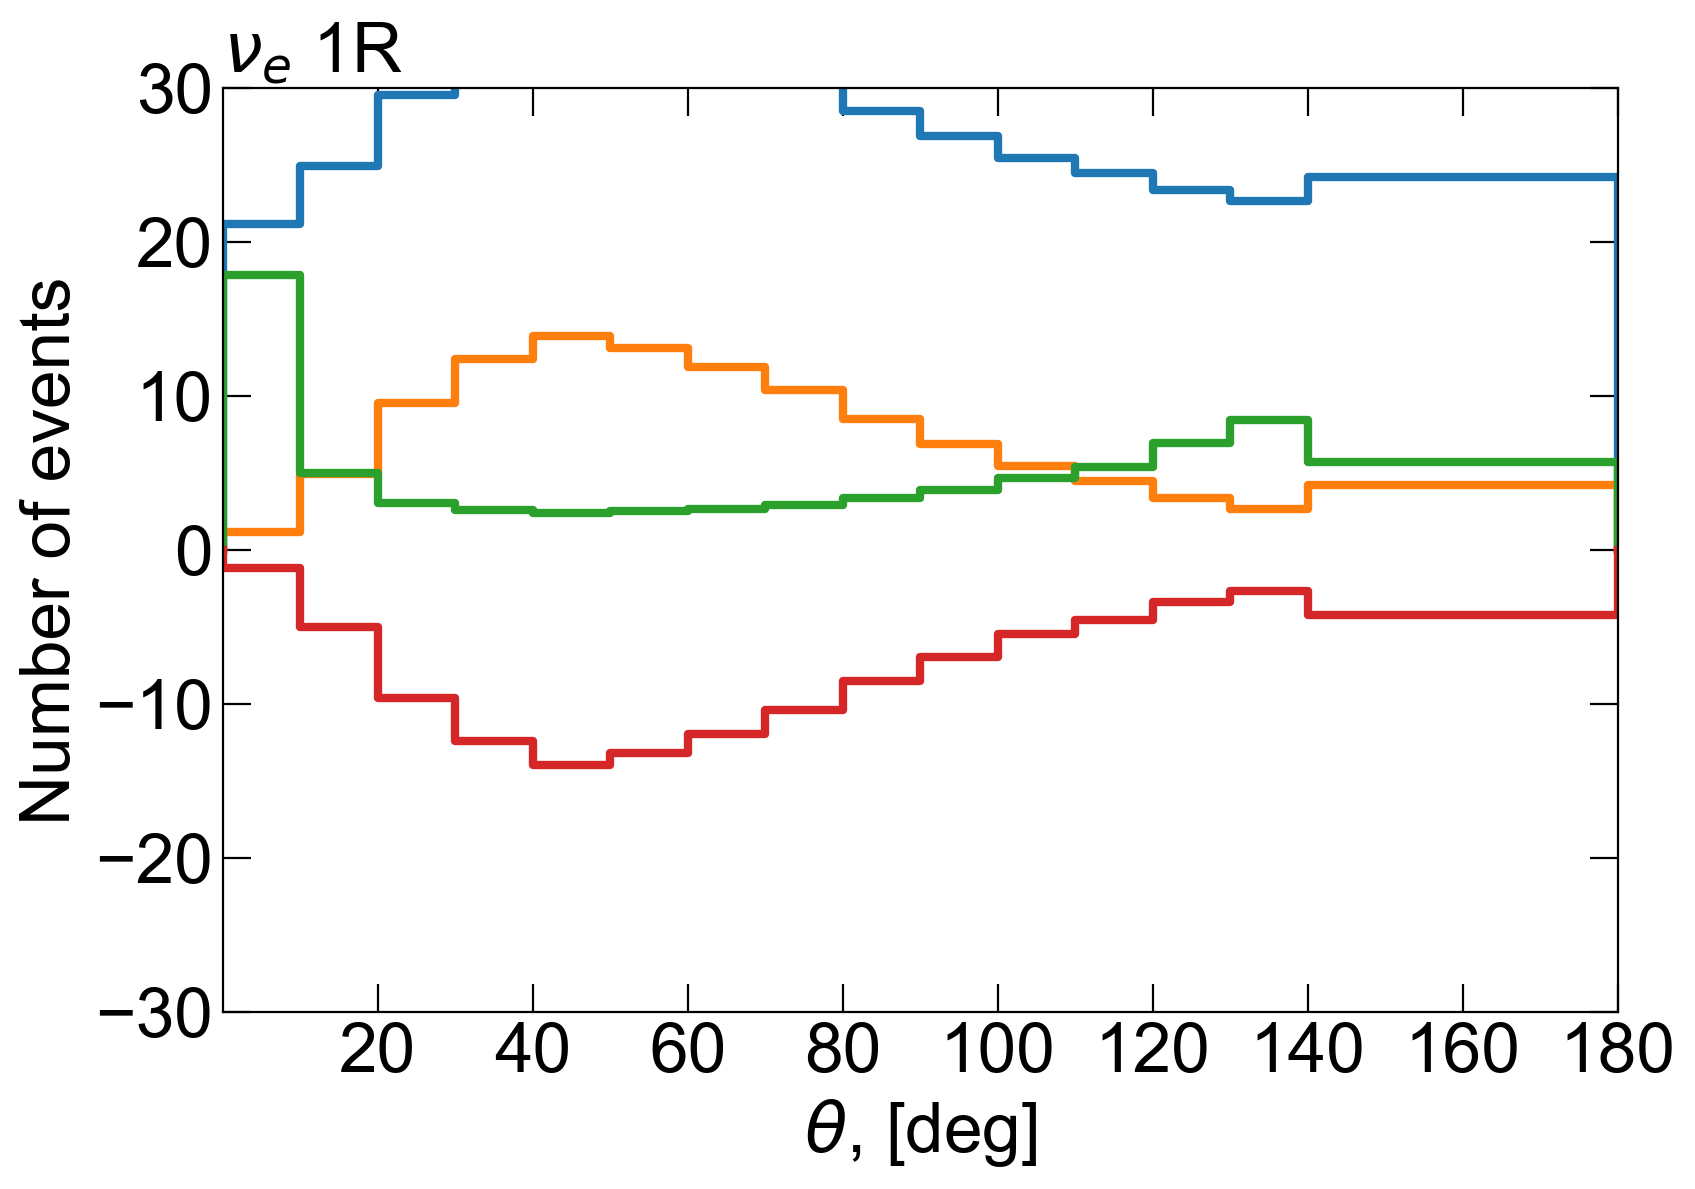

In [7]:
fig, ax = plt.subplots()
nue1R2x.plot(ax)
nue1R.plot(ax)
nue1R_div.plot(ax)
nue1R_neg.plot(ax)

ax.set_ylim(-30, 30)



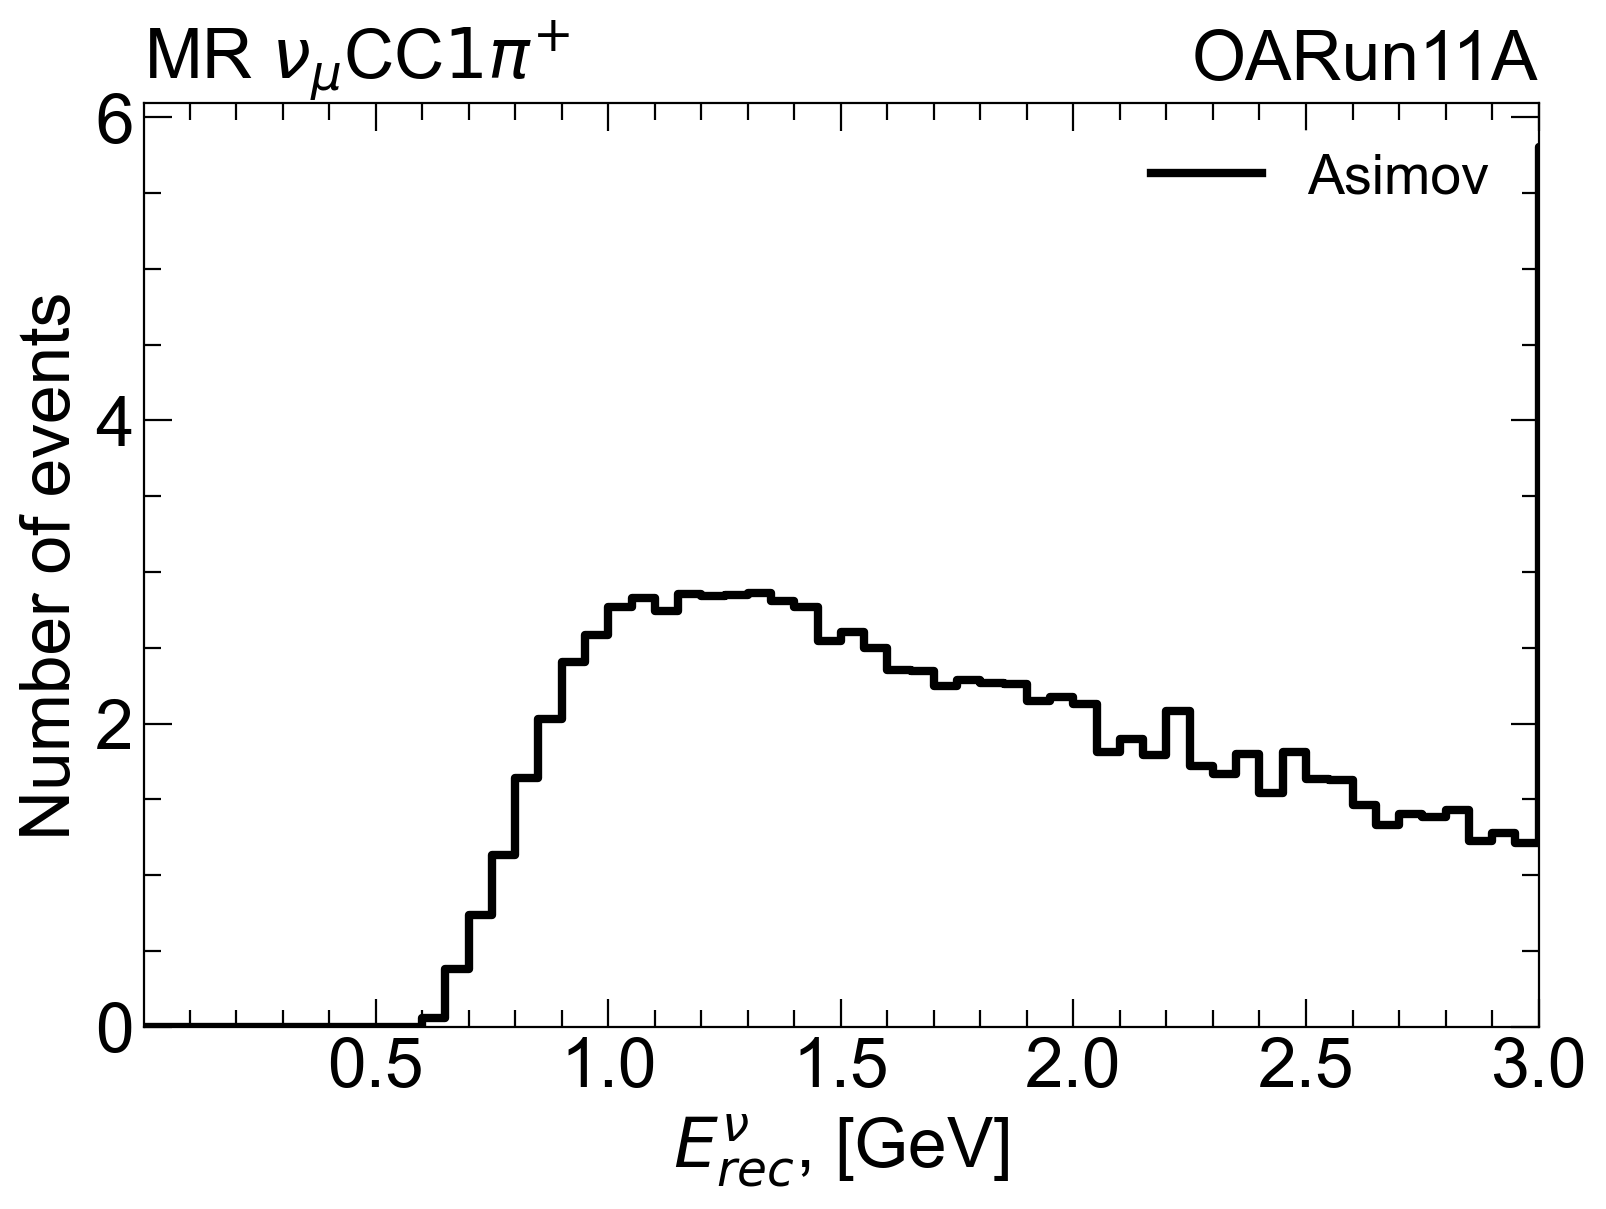

In [8]:
fig, ax = plt.subplots()
toy["numucc1pi"].plot(ax, wtag=True, color='black', label='Asimov')
show_minor_ticks(ax)
plt.legend()

AttributeError: 'ToyXp' object has no attribute 'get_sample'

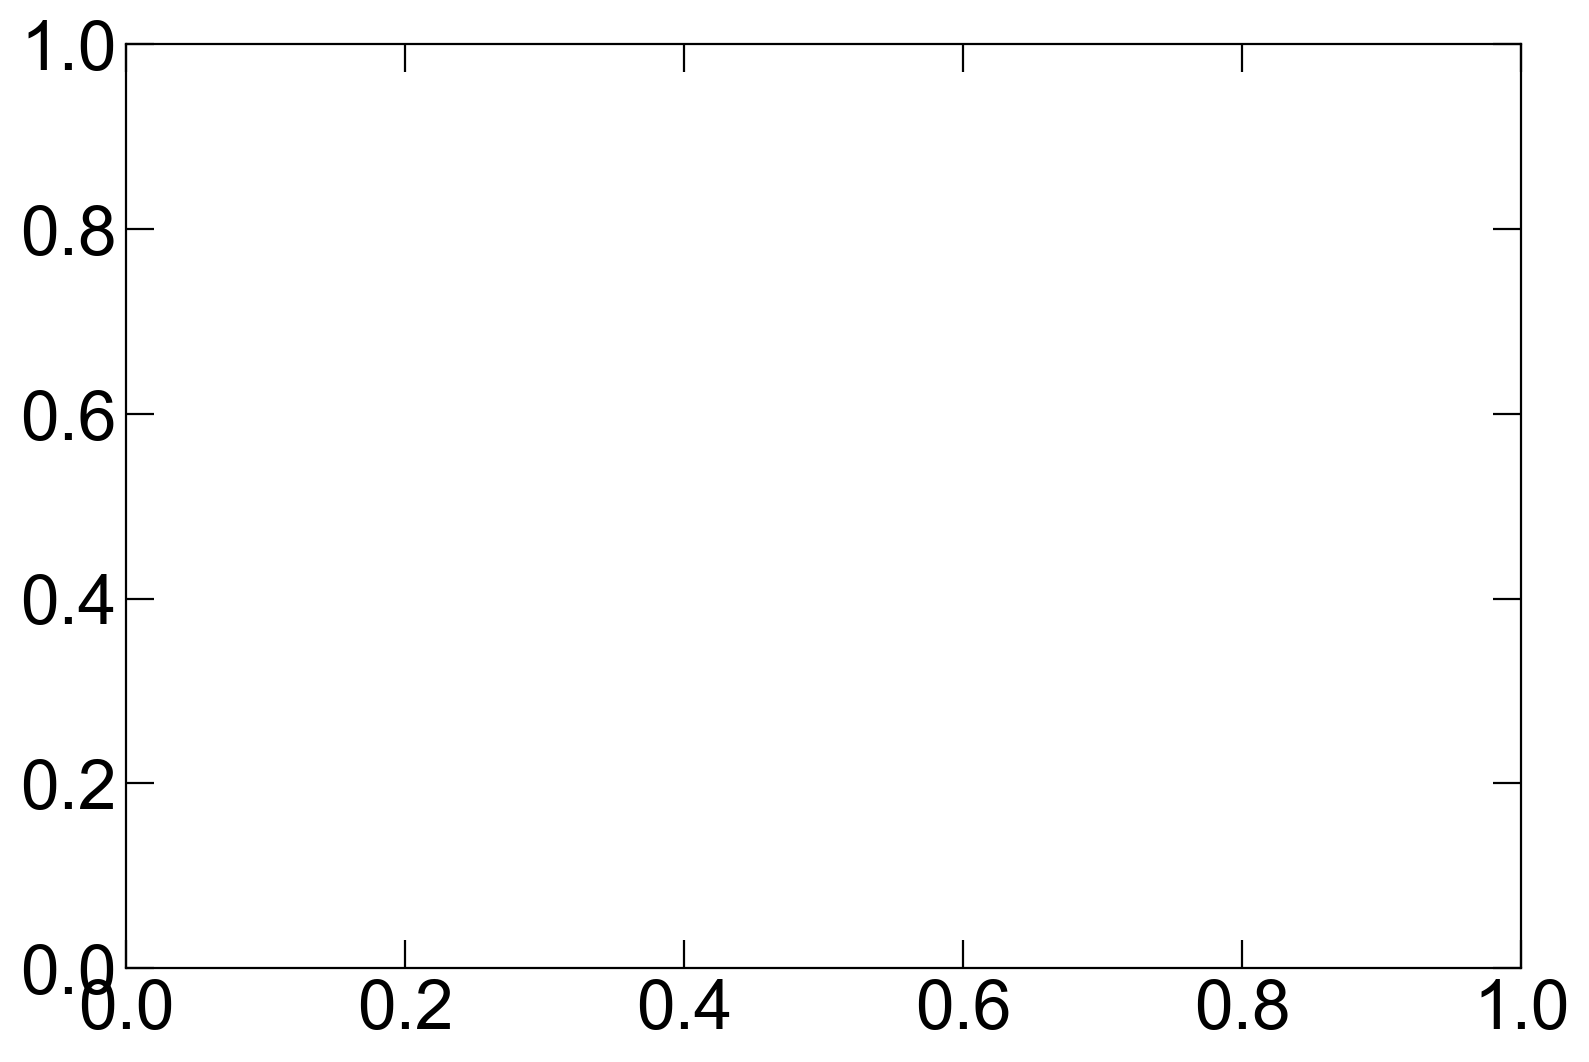

In [9]:
fig, ax = plt.subplots()
sample_rebinned = toy.get_sample('numu1R').rebin([np.array([0, 0.5, 1, 2, 3, 30]), np.array([0, 20, 60, 180])])

sample_rebinned.plot(ax, wtag=False)


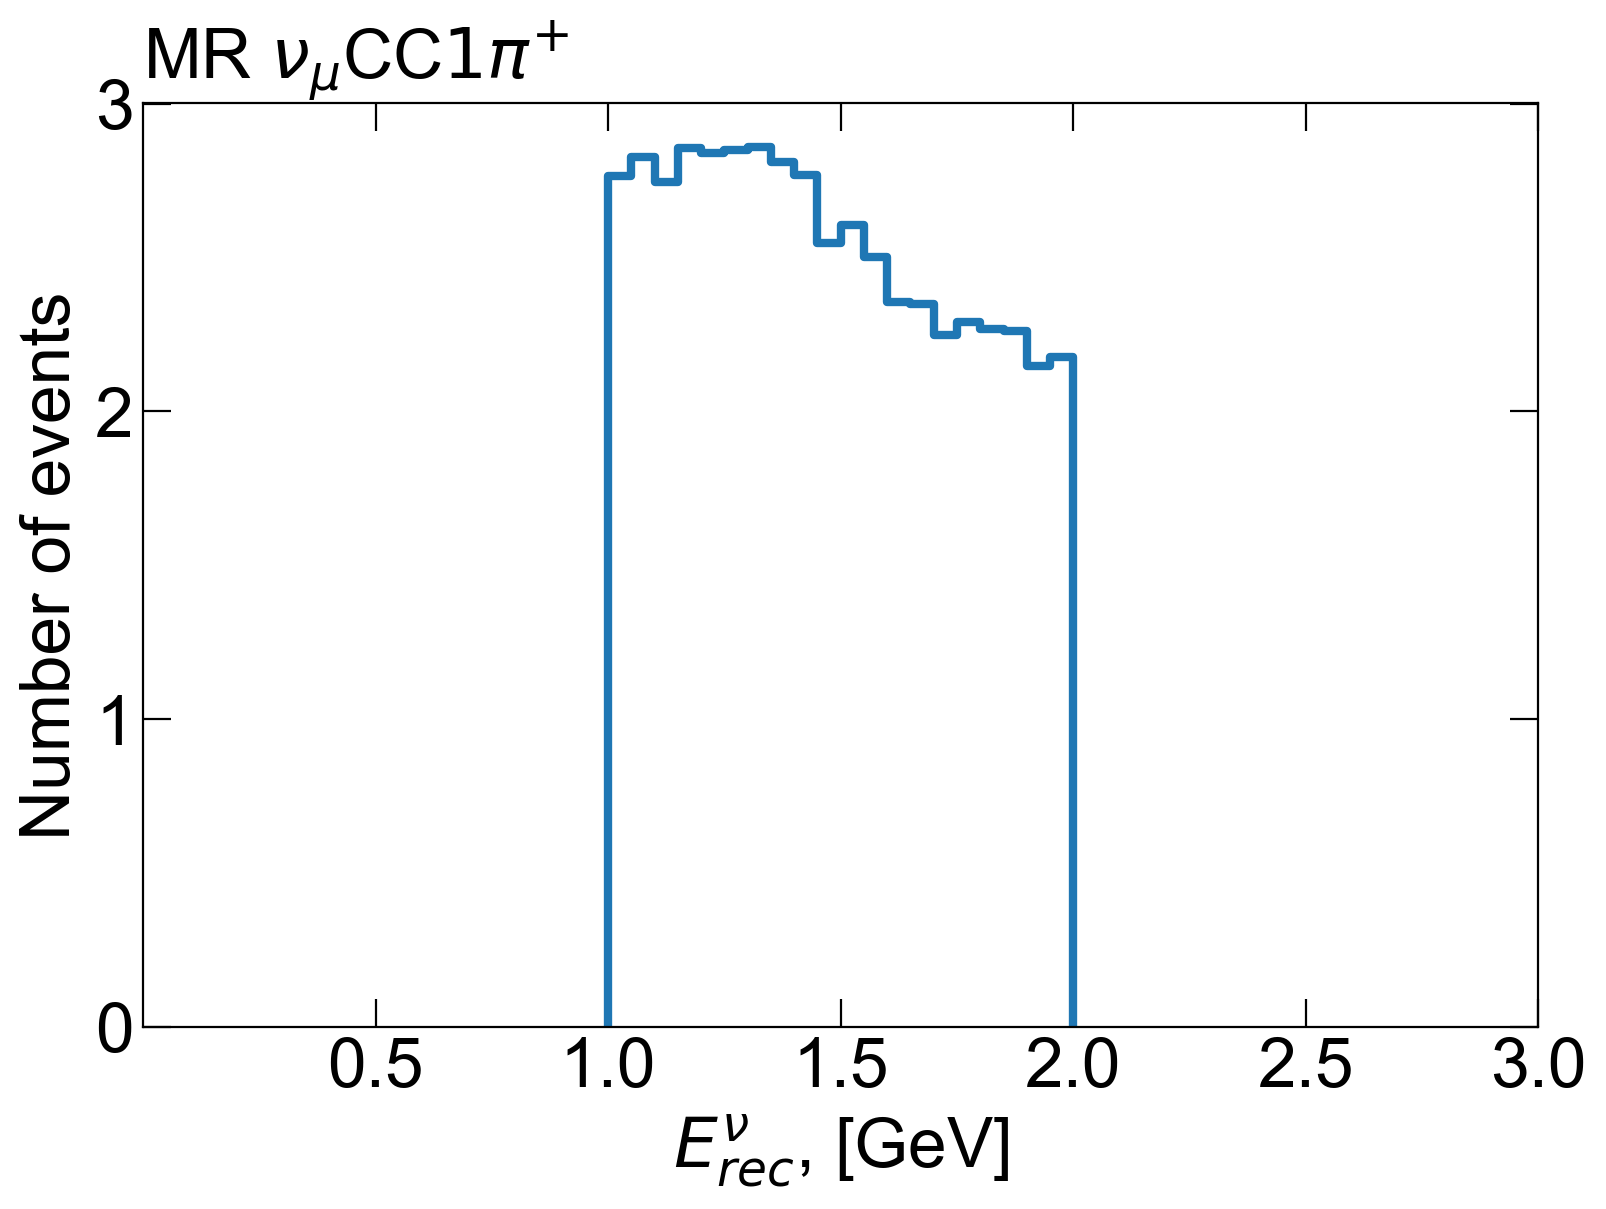

In [11]:
fig, ax = plt.subplots()
sample_slice = toy['numucc1pi'].slice(1, 2)
sample_slice.plot(ax, wtag=False)

Title: numu1R; Sample title: numu1R; Dimension: 2; Shape: (20, 5); Analysis type: e-theta Integral: 181.1205687626439


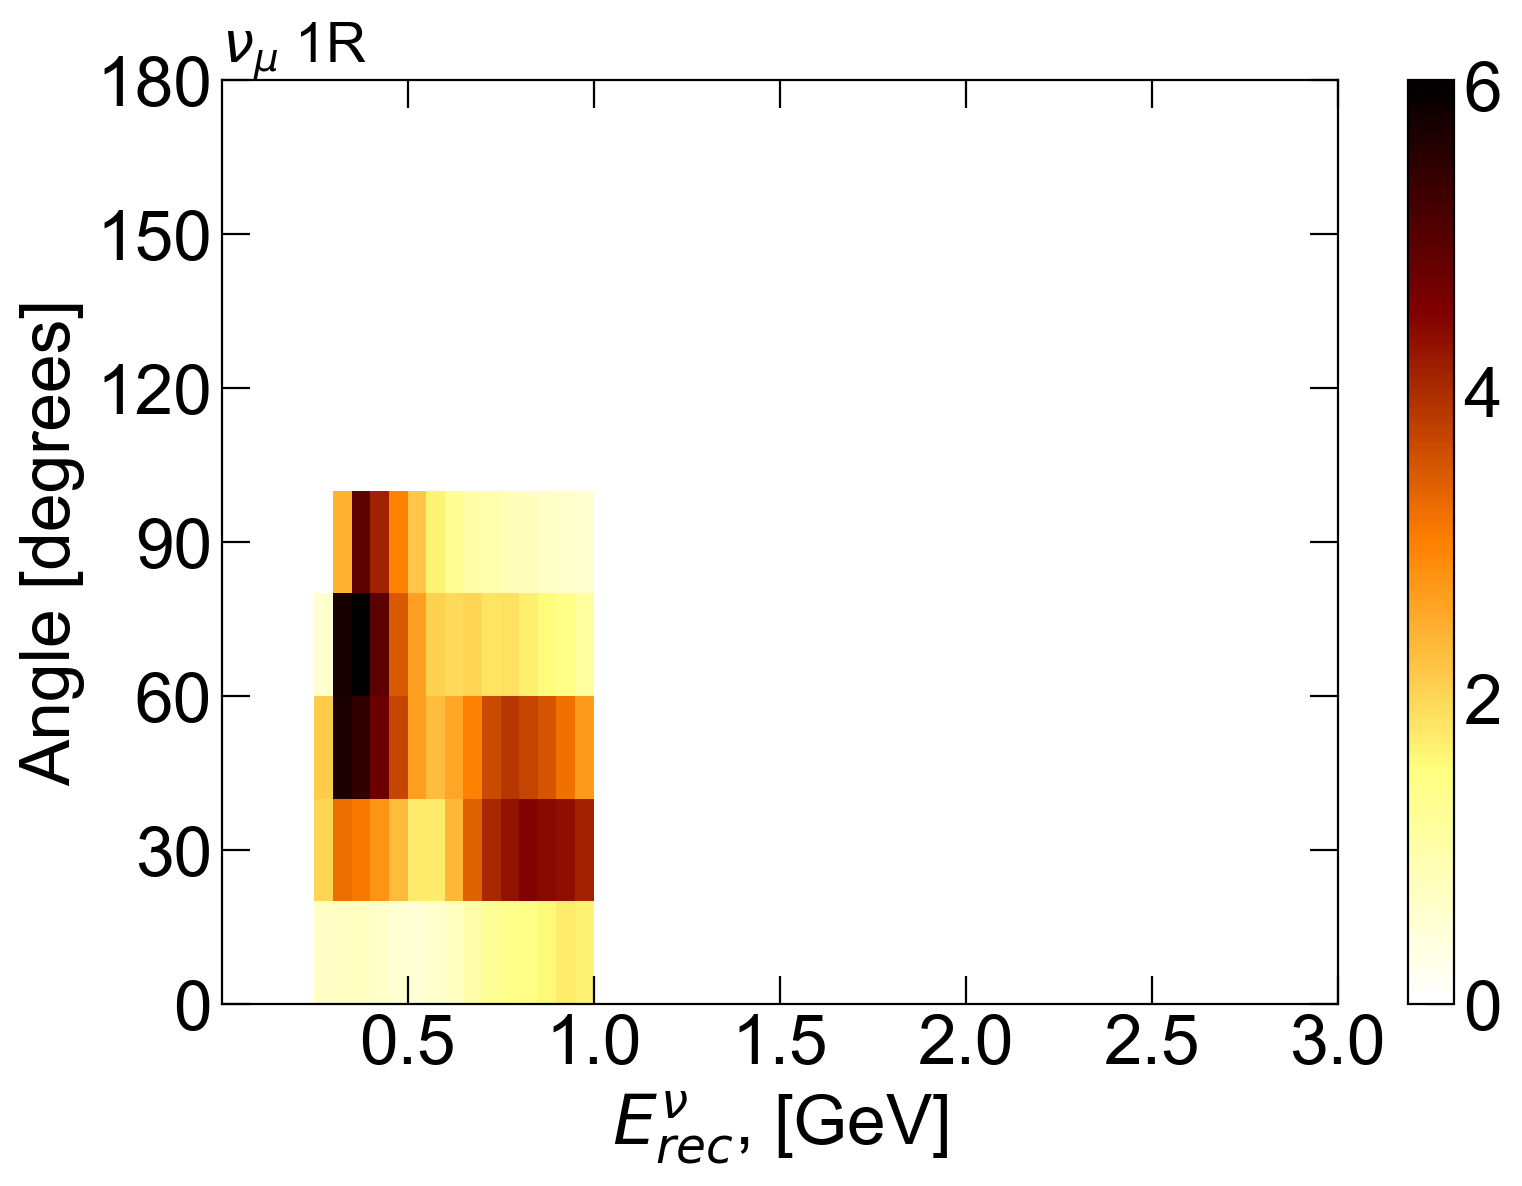

In [12]:
fig, ax = plt.subplots()
sample_slice = toy['numu1R'].slice(0, 1, 0, 100)
sample_slice2 = toy['numubar1R'].slice(0, 1, 0, 100)

print(sample_slice)
sample_slice.plot(ax, wtag=False)

In [14]:
bin_edges = [0, 10, 20, 100]
z = [10, 20, 30]
sample_test = toyxp.Sample([bin_edges], z)

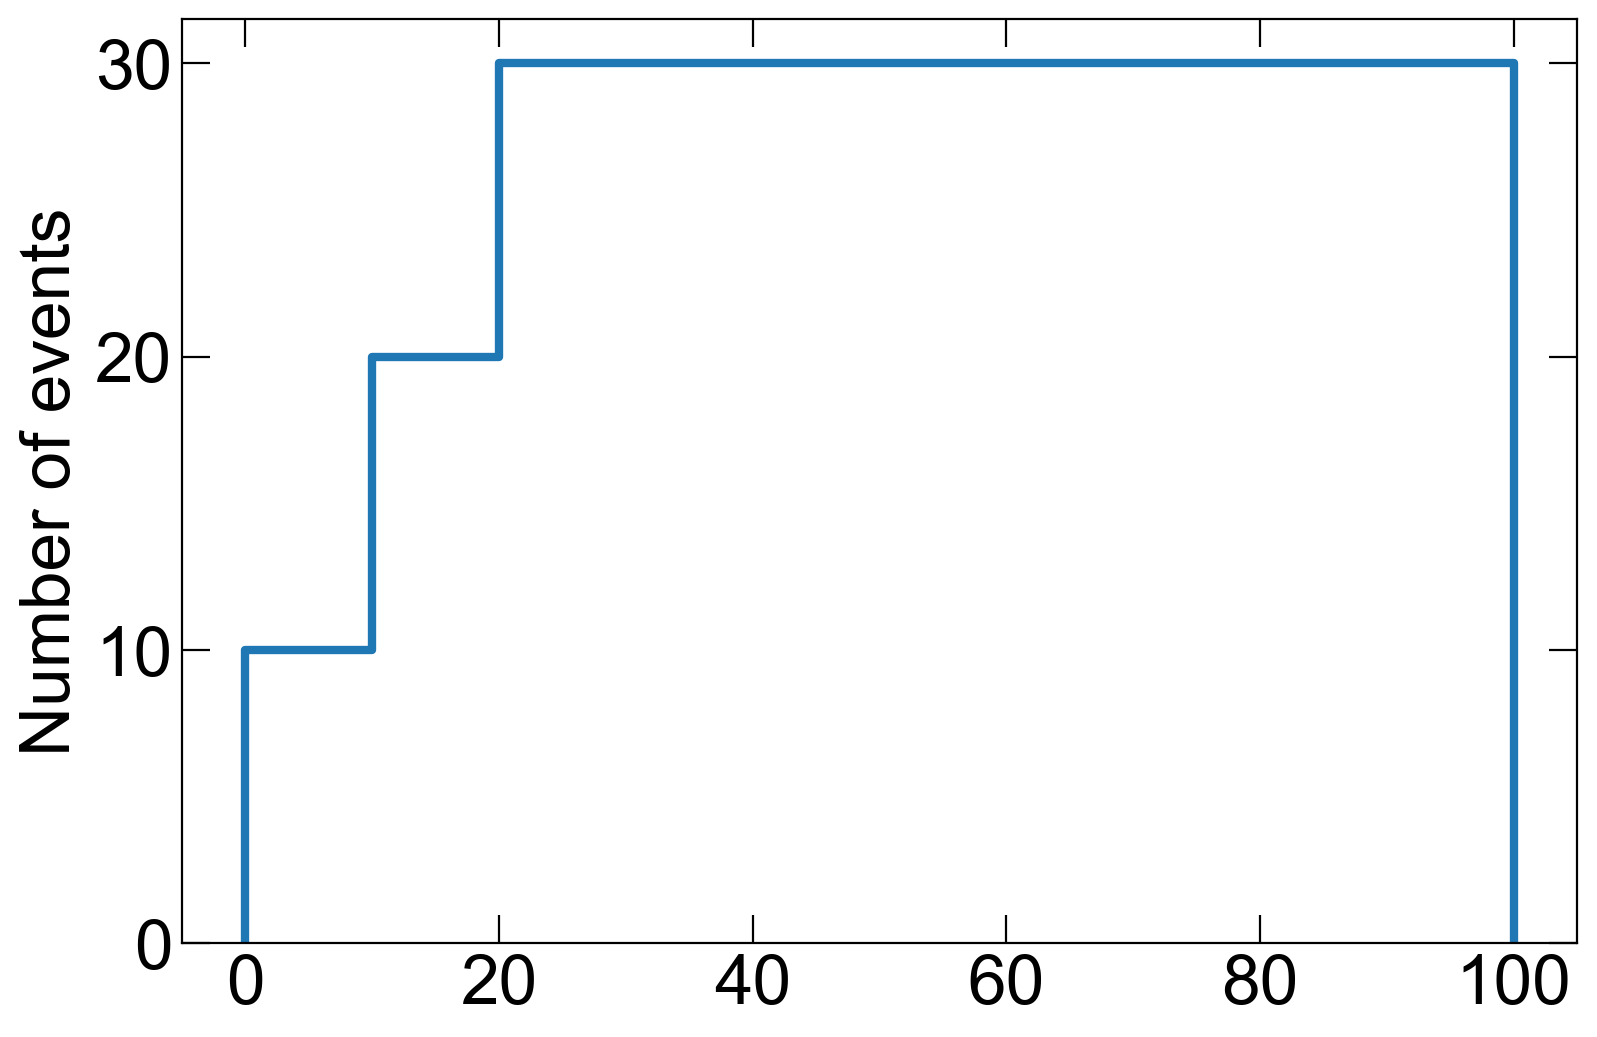

In [15]:
fig, ax = plt.subplots()
sample_test.plot(ax)

In [16]:
file_pattern = "../inputs/MargTemplates/MargTemplates_100k_AsimovA22deltaneg025pi_delta_script_320kA_cycles5_ratio3_Ptheta_\
OA2024_flux_covariance_23av1_banff_default_mode_0_woRC_merged.root"
grid, avnllh, param_name = pythetatools.likelihood.load(file_pattern, 100000, 100000)
llh = likelihood.Loglikelihood(grid, avnllh, param_name, kind='joint')


Number of entries in 'MargTemplate': 102.
Grid sizes: [51] for parameters ['delta']


In [17]:
llh.grid

[array([-3.14159265, -3.01592895, -2.89026524, -2.76460154, -2.63893783,
        -2.51327412, -2.38761042, -2.26194671, -2.136283  , -2.0106193 ,
        -1.88495559, -1.75929189, -1.63362818, -1.50796447, -1.38230077,
        -1.25663706, -1.13097336, -1.00530965, -0.87964594, -0.75398224,
        -0.62831853, -0.50265482, -0.37699112, -0.25132741, -0.12566371,
         0.        ,  0.12566371,  0.25132741,  0.37699112,  0.50265482,
         0.62831853,  0.75398224,  0.87964594,  1.00530965,  1.13097336,
         1.25663706,  1.38230077,  1.50796447,  1.63362818,  1.75929189,
         1.88495559,  2.0106193 ,  2.136283  ,  2.26194671,  2.38761042,
         2.51327412,  2.63893783,  2.76460154,  2.89026524,  3.01592895,
         3.14159265])]

In [18]:
llh/llh

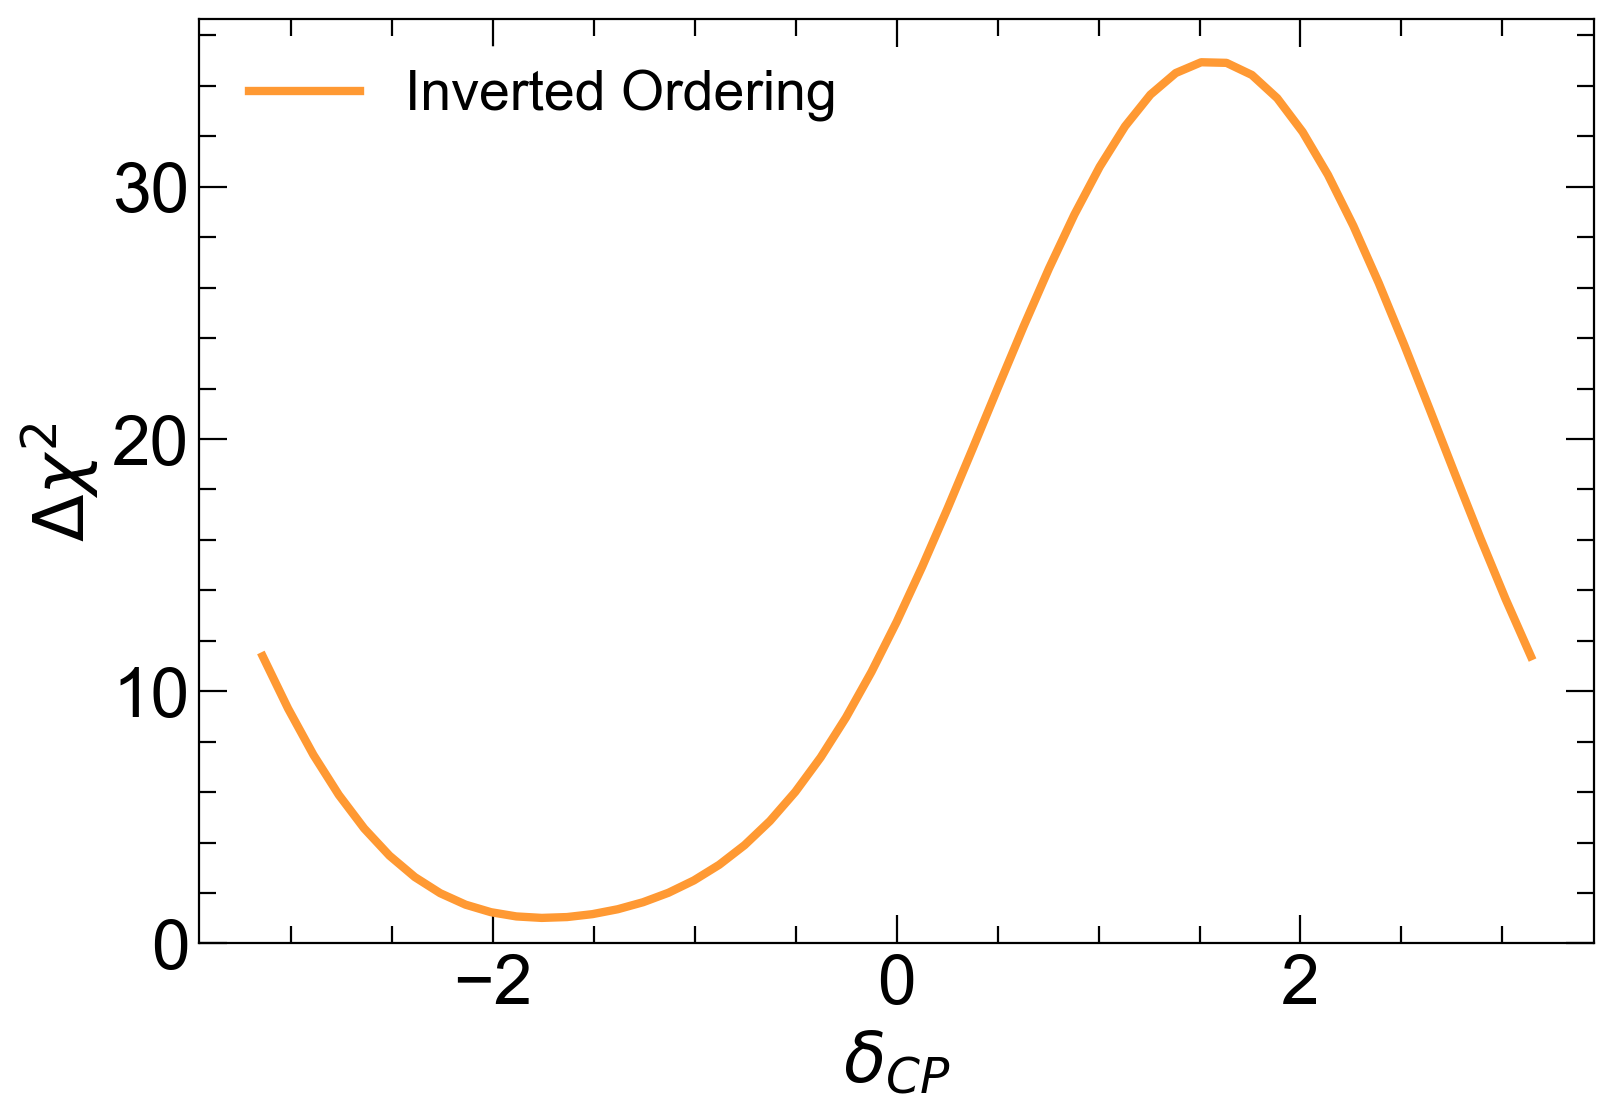

In [19]:
fig, ax = plt.subplots()
(llh*2).plot(ax, mo=1)

In [20]:
file_pattern = "../inputs/MargTemplates/MargTemplates_OA2023_sin223_dm2_100k_e-theta_AsimovA22_NO_mode_0/m*.root"
grid, avnllh, param_name = likelihood.load(file_pattern, 100000, 100000, mo=0)
llh = likelihood.Loglikelihood(grid, avnllh, param_name)

Number of entries in 'MargTemplate': 3321.
Grid sizes: [41, 81] for parameters ['dm2', 'sin223']


In [21]:
contour_kwargs = {
}

scatter_kwargs = {
    's': 100,
    'marker' : '+',
    'label': 'Best Fit'
}


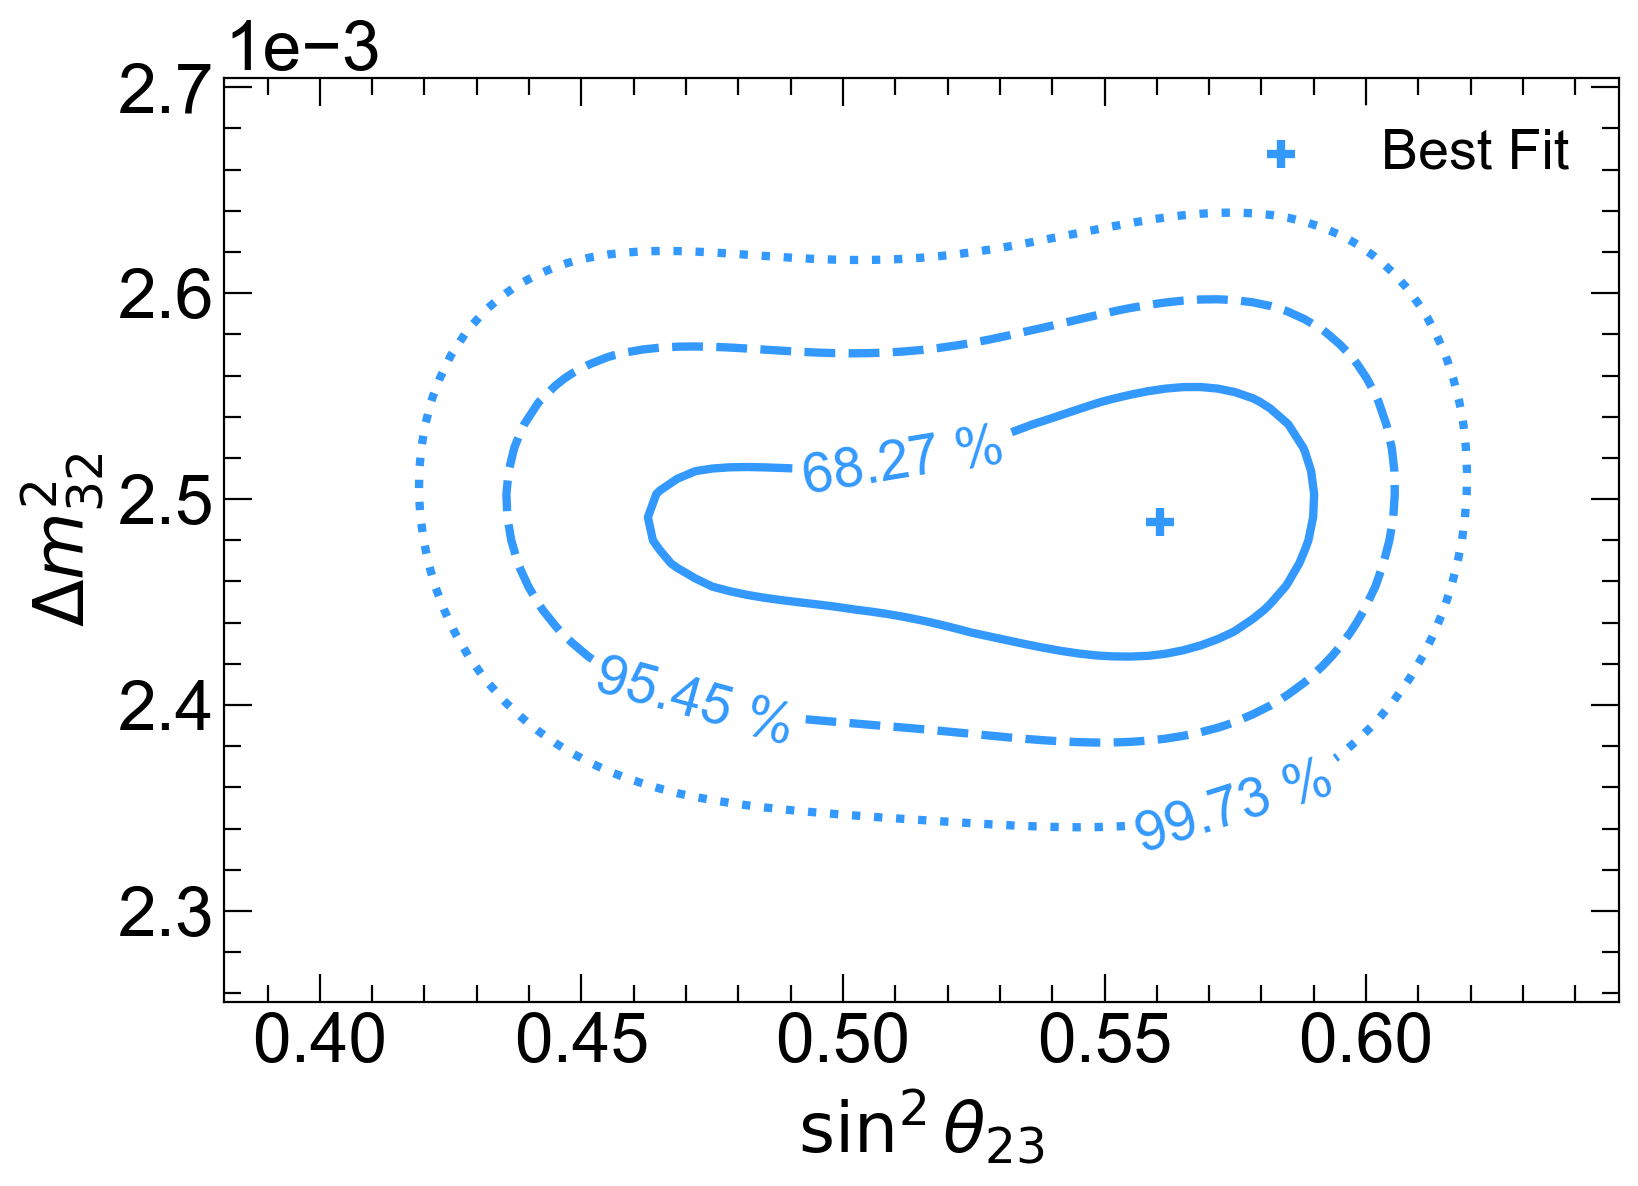

In [22]:
fig, ax = plt.subplots()
llh.plot(ax, show_map=False, mo=0, cls=['1sigma', '2sigma', '3sigma'], contour_kwargs=contour_kwargs, scatter_kwargs=scatter_kwargs)


ax.legend()